In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA

In [3]:
np.random.seed(0)
row=10
col=3
data=np.random.rand(row,col)
data

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276],
       [0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985],
       [0.77815675, 0.87001215, 0.97861834],
       [0.79915856, 0.46147936, 0.78052918],
       [0.11827443, 0.63992102, 0.14335329],
       [0.94466892, 0.52184832, 0.41466194]])

In [4]:
mean=np.mean(data)
mean

0.5811203282945502

In [5]:
mean_data=data-data.mean(axis=0)
mean_data

array([[ 0.02779771,  0.08904756,  0.00655999],
       [ 0.02386739, -0.20248701,  0.04969073],
       [-0.08342858,  0.26563119,  0.36745938],
       [-0.13757427,  0.16558323, -0.06730846],
       [ 0.04702877,  0.29945483, -0.52516732],
       [-0.43388649, -0.60592341,  0.23641646],
       [ 0.25714096,  0.24387034,  0.38241496],
       [ 0.27814277, -0.16466245,  0.18432579],
       [-0.40274137,  0.01377921, -0.45285009],
       [ 0.42365312, -0.10429349, -0.18154144]])

In [6]:
covar=np.cov(mean_data,rowvar=False)
covar

array([[ 0.07809622,  0.02187354,  0.01197445],
       [ 0.02187354,  0.07793089, -0.01643627],
       [ 0.01197445, -0.01643627,  0.09911224]])

In [7]:
eigval,eigvec=np.linalg.eig(covar)
eigval

array([0.04818162, 0.09888321, 0.10807453])

In [8]:
eigvec

array([[-0.64030344,  0.76811634,  0.00296404],
       [ 0.67417039,  0.56383081, -0.477063  ],
       [ 0.3681111 ,  0.30346681,  0.8788641 ]])

In [9]:
sorted_ind=np.argsort(eigval)[::-1]
sorted_ind

array([2, 1, 0], dtype=int64)

In [10]:
sorted_eigvec=eigvec[:,sorted_ind]
sorted_eigvec

array([[ 0.00296404,  0.76811634, -0.64030344],
       [-0.477063  ,  0.56383081,  0.67417039],
       [ 0.8788641 ,  0.30346681,  0.3681111 ]])

In [11]:
(row1,col1)=np.shape(sorted_eigvec)
row1,col1

(3, 3)

In [12]:
k=2
selected_eigvec=sorted_eigvec[:,:k]
selected_eigvec

array([[ 0.00296404,  0.76811634],
       [-0.477063  ,  0.56383081],
       [ 0.8788641 ,  0.30346681]])

In [13]:
projected_data = np.dot(mean_data,selected_eigvec)
projected_data

array([[ 0.19018342,  1.0077171 ],
       [ 0.36715818,  0.85341073],
       [ 0.42279373,  1.13136664],
       [ 0.08826058,  0.90142872],
       [-0.37745316,  0.9797613 ],
       [ 0.7223725 ,  0.33099768],
       [ 0.44732842,  1.38523276],
       [ 0.46819308,  1.11090774],
       [-0.17894401,  0.49515867],
       [ 0.118277  ,  1.14568593]])

In [14]:
pca=PCA(n_components=2)
tran_data=pca.fit_transform(data)
tran_data

array([[ 0.03663356, -0.07355037],
       [-0.1403412 ,  0.08075599],
       [-0.19597676, -0.19719992],
       [ 0.1385564 ,  0.03273801],
       [ 0.60427013, -0.04559457],
       [-0.49555553,  0.60316904],
       [-0.22051144, -0.45106603],
       [-0.24137611, -0.17674101],
       [ 0.40576099,  0.43900806],
       [ 0.10853997, -0.2115192 ]])

<function matplotlib.pyplot.show(close=None, block=None)>

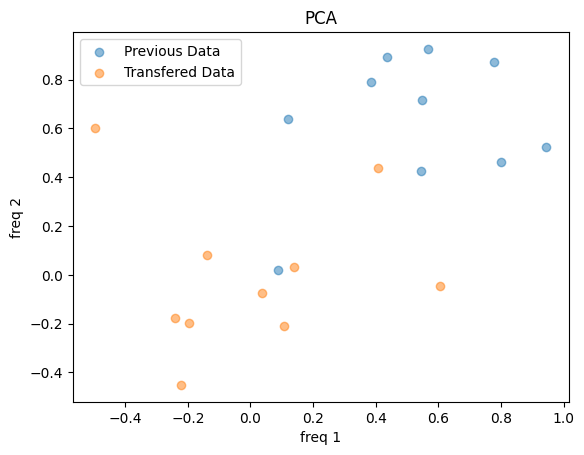

In [15]:
plt.scatter(data[:,0],data[:,1],alpha=0.5,label="Previous Data")
plt.scatter(tran_data[:,0],tran_data[:,1],alpha=0.5,label="Transfered Data")
plt.xlabel("freq 1")
plt.ylabel("freq 2")
plt.title("PCA")
plt.legend()
plt.show

In [16]:
from sklearn.preprocessing import StandardScaler

data = [[1.0, 2.0],
        [3.0, 4.0],
        [5.0, 6.0]]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


print("Original data:")
print(data)

print("\nScaled data:")
print(scaled_data)


Original data:
[[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]]

Scaled data:
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [17]:
from sklearn.preprocessing import MinMaxScaler

data = [[1.0, 2.0],
        [3.0, 4.0],
        [5.0, 6.0]]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

print("Original data:")
print(data)

print("\nScaled data:")
print(scaled_data)


Original data:
[[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]]

Scaled data:
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


In [18]:
from sklearn.preprocessing import RobustScaler

data = [[1.0, 2.0],
        [3.0, 4.0],
        [5.0, 100.0]]  # Introducing an outlier in the second feature

scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

print("Original data:")
print(data)

print("\nScaled data:")
print(scaled_data)


Original data:
[[1.0, 2.0], [3.0, 4.0], [5.0, 100.0]]

Scaled data:
[[-1.         -0.04081633]
 [ 0.          0.        ]
 [ 1.          1.95918367]]


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

# True labels and predicted labels
true_labels = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
predicted_labels = [1, 0, 0, 1, 0, 1, 1, 0, 0, 1]

# Calculate precision
precision = precision_score(true_labels, predicted_labels)
print("Precision:", precision)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)
print("F1 Score:", f1)

Precision: 0.6
Recall: 0.6
F1 Score: 0.6


In [20]:
from sklearn.model_selection import train_test_split

X = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [0, 1, 0, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train: [[1, 2], [5, 6]]
X_test: [[3, 4], [7, 8]]
y_train: [0, 0]
y_test: [1, 1]


In [22]:
from sklearn.cluster import KMeans
np.random.seed(0)
x=np.random.rand(10,2)
x

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215]])

In [24]:
clust=3
kmeans=KMeans(n_clusters=clust, n_init=10)
kmeans.fit(x)

KMeans(n_clusters=3, n_init=10)

In [27]:
labels=kmeans.labels_
labels

array([0, 2, 0, 0, 2, 2, 0, 1, 0, 2])

In [28]:
cluster_centers=kmeans.cluster_centers_
cluster_centers

array([[0.39966369, 0.80221459],
       [0.07103606, 0.0871293 ],
       [0.78407698, 0.58180794]])

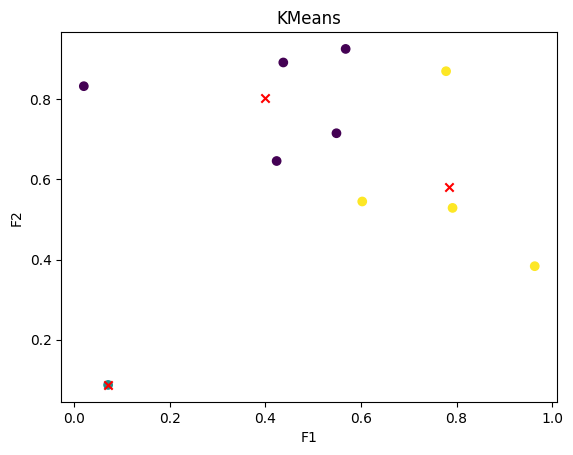

In [32]:
plt.scatter(x[:,0],x[:,1],c=labels,cmap='viridis')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='red',marker='x')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title("KMeans")
plt.show()


In [51]:
x=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Python Tuto\data.csv")
x

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [141]:
df=pd.DataFrame(x)
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [146]:
x=df.iloc[:,:2]
x

,Duration,Pulse
0,60,110
1,60,117
2,60,103
3,45,109
4,45,117
...,...,...
164,60,105
165,60,110
166,60,115
167,75,120


In [151]:
d1f=x[(x['Pulse']>115) &(x['Pulse']<126)]
ll=d1f.head()
ll

,Duration,Pulse
1,60,117
4,45,117
51,80,123
53,60,118
55,60,121


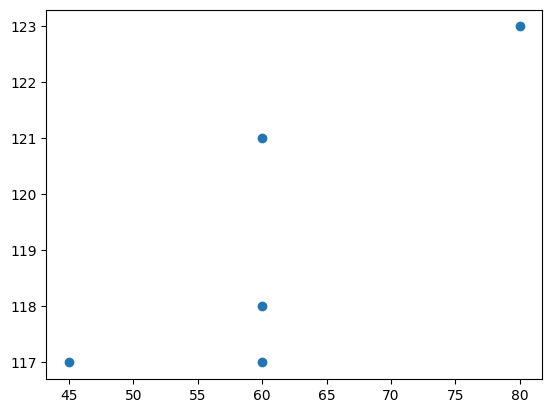

In [152]:
plt.scatter(ll["Duration"],ll["Pulse"])
plt.show()

In [153]:
kme=KMeans(n_clusters=3,n_init=10)
y=kme.fit_predict(ll)
y

array([1, 2, 0, 1, 1])

In [157]:
from sklearn.preprocessing import MinMaxScaler

# Create the MinMaxScaler
scaler = MinMaxScaler()

# Specify the columns you want to scale
columns_to_scale = ['Duration', 'Pulse']

# Fit and transform the specified columns
ll[columns_to_scale] = scaler.fit_transform(ll[columns_to_scale])

# Print the scaled DataFrame
print(ll)

    Duration     Pulse
1   1.000000  0.966942
4   0.000000  0.000000
51  0.016667  0.008264
53  1.000000  0.975207
55  1.000000  1.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_7300\1547760861.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ll[columns_to_scale] = scaler.fit_transform(ll[columns_to_scale])


In [158]:
ll['cluster']=y
ll

C:\Users\Dell\AppData\Local\Temp\ipykernel_7300\1144580462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ll['cluster']=y


,Duration,Pulse,cluster
1,1.000000,0.966942,1
4,0.000000,0.000000,2
51,0.016667,0.008264,0
53,1.000000,0.975207,1
55,1.000000,1.000000,1


Text(0.5, 1.0, 'Pul_Dur')

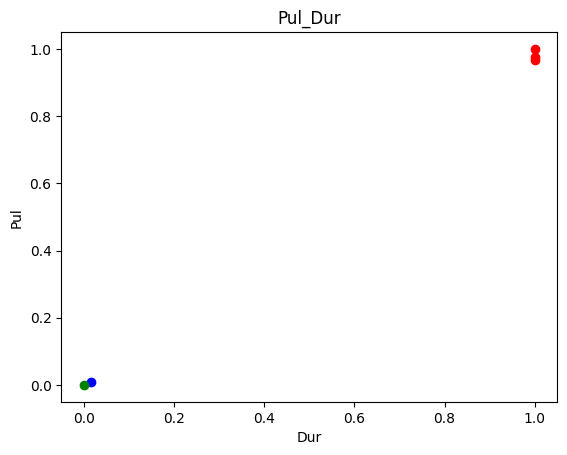

In [159]:
f1=ll[ll.cluster==0]
f2=ll[ll.cluster==1]
f3=ll[ll.cluster==2]

plt.scatter(f1['Duration'],f1['Pulse'],color='blue')
plt.scatter(f2['Duration'],f2['Pulse'],color='red')
plt.scatter(f3['Duration'],f3['Pulse'],color='green')
plt.xlabel("Dur")
plt.ylabel("Pul")
plt.title("Pul_Dur")

In [123]:
m={'Pulse':[13,26,42,39,63,72,88,54,41,69,75],
  'Duration':[20,25,30,35,40,45,50,55,60,65,70]}
df1=pd.DataFrame(m)
df1

,Pulse,Duration
0,13,20
1,26,25
2,42,30
3,39,35
4,63,40
5,72,45
6,88,50
7,54,55
8,41,60
9,69,65


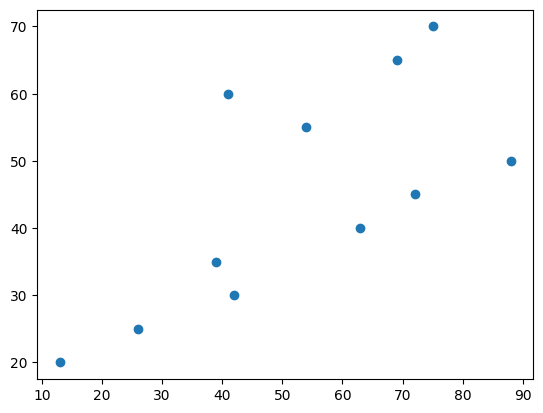

In [124]:
plt.scatter(df1['Pulse'],df1['Duration'])
plt.show()

In [186]:
clust=4
k11=KMeans(n_clusters=clust,n_init=10)
mm=k11.fit_predict(df1)
mm

array([0, 0, 0, 0, 2, 2, 2, 3, 3, 1, 1])

In [180]:
scaler=MinMaxScaler()
sc1=['Pulse','Duration']
df1[sc1]=scaler.fit_transform(df1[sc1])
df1

,Pulse,Duration,Cluster
0,0.000000,0.0,1
1,0.173333,0.1,1
2,0.386667,0.2,1
3,0.346667,0.3,1
4,0.666667,0.4,0
5,0.786667,0.5,0
6,1.000000,0.6,0
7,0.546667,0.7,2
8,0.373333,0.8,2
9,0.746667,0.9,3


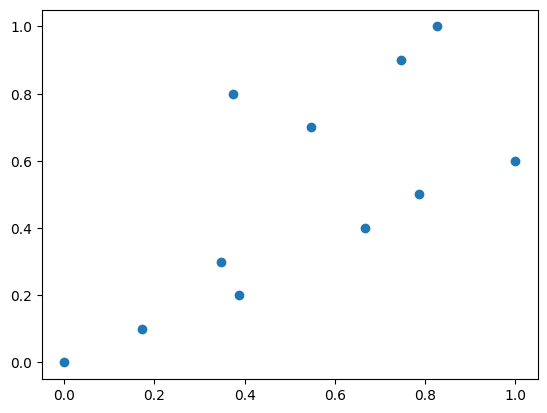

In [181]:
plt.scatter(df1['Pulse'],df1['Duration'])
plt.show()

In [182]:
df1['Cluster']=mm
df1

,Pulse,Duration,Cluster
0,0.000000,0.0,1
1,0.173333,0.1,1
2,0.386667,0.2,1
3,0.346667,0.3,1
4,0.666667,0.4,0
5,0.786667,0.5,0
6,1.000000,0.6,0
7,0.546667,0.7,2
8,0.373333,0.8,2
9,0.746667,0.9,3


In [192]:
y11=k11.cluster_centers_
y11

array([[0.22666667, 0.15      , 1.        ],
       [0.78666667, 0.95      , 3.        ],
       [0.81777778, 0.5       , 0.        ],
       [0.46      , 0.75      , 2.        ]])

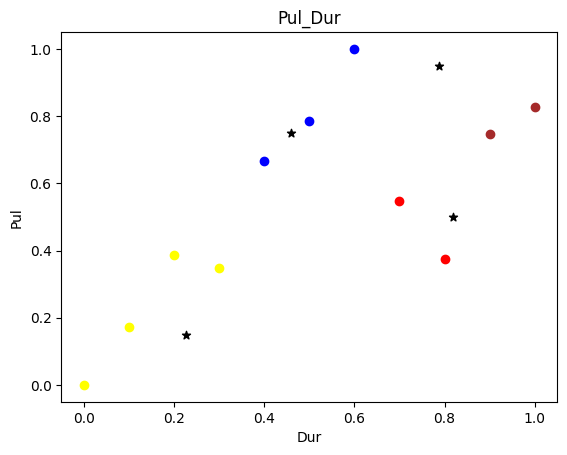

In [196]:
df2=df1[df1.Cluster==0]
df3=df1[df1.Cluster==1]
df4=df1[df1.Cluster==2]
df5=df1[df1.Cluster==3]

plt.scatter(df2['Duration'],df2['Pulse'],color='blue')
plt.scatter(df3['Duration'],df3['Pulse'],color='yellow')
plt.scatter(df4['Duration'],df4['Pulse'],color='red')
plt.scatter(df5['Duration'],df5['Pulse'],color='brown')
plt.scatter(y11[:,0],y11[:,1],color='black',marker='*',label='centroid')
plt.xlabel("Dur")
plt.ylabel("Pul")
plt.title("Pul_Dur")
plt.show()

In [198]:
sse=[]
for i in range(1,10):
    m11=KMeans(n_clusters=i)
    n11=m11.fit(df1[sc1])
    sse.append(m11.inertia_)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

In [199]:
sse

[2.027450505050505,
 0.6709777777777777,
 0.39616296296296294,
 0.2494518518518518,
 0.1310518518518518,
 0.06624444444444444,
 0.046222222222222206,
 0.0262,
 0.014000000000000004]

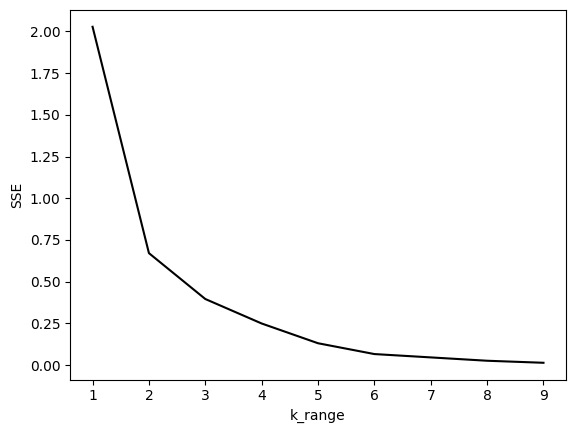

In [202]:
plt.xlabel("k_range")
plt.ylabel("SSE")
plt.plot(range(1,10),sse,color='black')

In [264]:
k=pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\Python Tuto\data.csv')
df4=k.iloc[:10,:]
df4

,Duration,Pulse
0,60,110
1,60,117
2,60,103
3,45,109
4,45,117
5,60,102
6,60,110
7,45,104
8,30,109
9,60,98


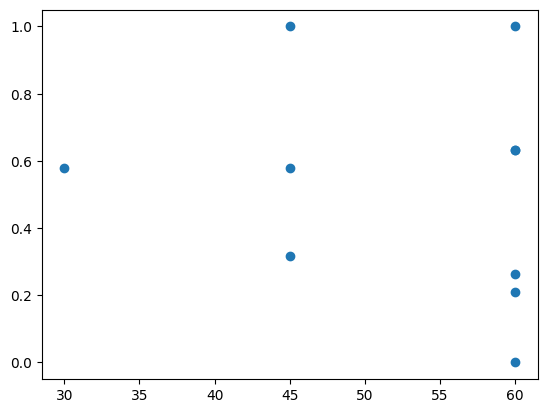

In [277]:
plt.scatter(df4['Duration'],df['Pulse'])

In [266]:
sca1=MinMaxScaler()
l=['Duration','Pulse']
df4[['Duration']]=sca1.fit_transform(df4[['Duration']])
df4[['Pulse']]=sca1.fit_transform(df4[['Pulse']])
df4

,Duration,Pulse
0,1.0,0.631579
1,1.0,1.000000
2,1.0,0.263158
3,0.5,0.578947
4,0.5,1.000000
5,1.0,0.210526
6,1.0,0.631579
7,0.5,0.315789
8,0.0,0.578947
9,1.0,0.000000


In [267]:
am3=KMeans(n_clusters=3,n_init=10)
am1=am3.fit_predict(df4)
am1

array([1, 1, 2, 0, 0, 2, 1, 0, 0, 2])

In [268]:
k6=am3.cluster_centers_
k6

array([[0.375     , 0.61842105],
       [1.        , 0.75438596],
       [1.        , 0.15789474]])

In [272]:
df4['clusters']=am1
df4

,Duration,Pulse,clusters
0,1.0,0.631579,1
1,1.0,1.000000,1
2,1.0,0.263158,2
3,0.5,0.578947,0
4,0.5,1.000000,0
5,1.0,0.210526,2
6,1.0,0.631579,1
7,0.5,0.315789,0
8,0.0,0.578947,0
9,1.0,0.000000,2


<function matplotlib.pyplot.show(close=None, block=None)>

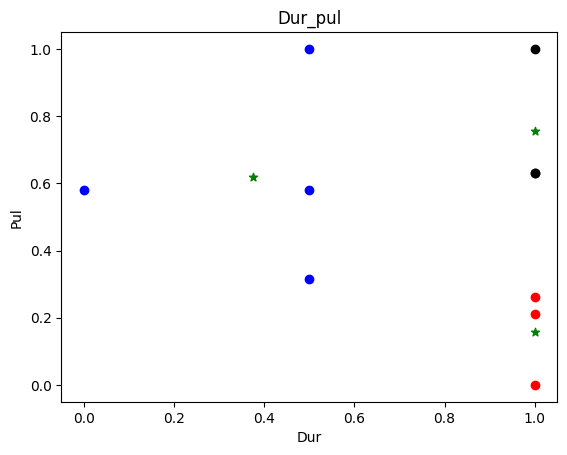

In [273]:
d1=df4[df4.clusters==0]
d2=df4[df4.clusters==1]
d3=df4[df4.clusters==2]

plt.scatter(d1['Duration'],d1['Pulse'],color='blue')
plt.scatter(d2['Duration'],d2['Pulse'],color='black')
plt.scatter(d3['Duration'],d3['Pulse'],color='red')
plt.scatter(k6[:,0],k6[:,1],color='green',label='Centroid',marker='*')
plt.xlabel('Dur')
plt.ylabel('Pul')
plt.title('Dur_pul')
plt.show

In [274]:
SSE=[]
for i in range(1,10):
    ds=KMeans(n_clusters=i,n_init=10)
    ds.fit(df4[l])
    SSE.append(ds.inertia_)
SSE

[2.091481994459834,
 1.0907779316712838,
 0.5570752539242851,
 0.3421052631578951,
 0.16389658356417391,
 0.07340720221606645,
 0.03601108033241006,
 0.0013850415512465227,
 0.0]

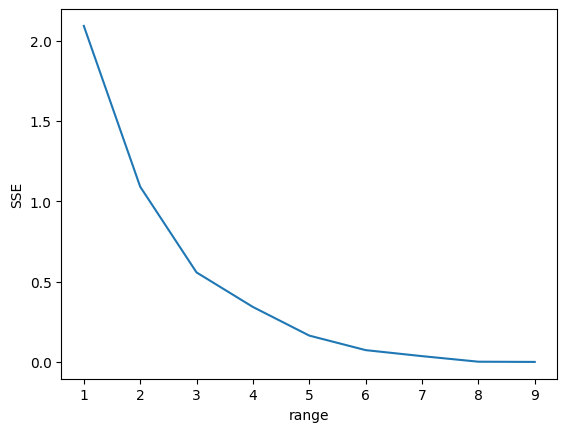

In [275]:
plt.plot(range(1,10),SSE)
plt.xlabel('range')
plt.ylabel('SSE')
plt.show()

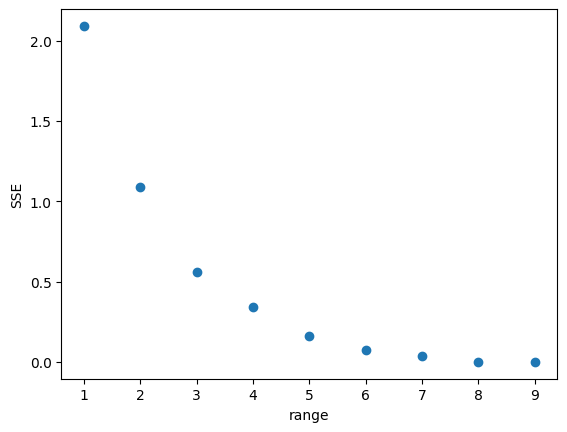

In [276]:
plt.scatter(range(1,10),SSE)
plt.xlabel('range')
plt.ylabel('SSE')
plt.show()

In [282]:
from sklearn.cluster import KMeans
import numpy as np

# Generating random data points
data = np.random.rand(100, 2)
df=pd.DataFrame(data)
# Creating a KMeans instance with 3 clusters
kmeans = KMeans(n_clusters=3,n_init=10)

# Fitting the model to the data
kmeans.fit(df)

# Getting cluster assignments and cluster centroids
cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster Assignments:", cluster_assignments)
print("Cluster Centroids:", centroids)
sse4=[]
for i in range(1,10):
    m7=KMeans(n_clusters=i,n_init=10)
    m7.fit(df)
    sse4.append(m7.inertia_)

Cluster Assignments: [2 1 2 0 2 2 2 1 2 0 0 1 0 0 1 2 2 2 0 0 0 0 2 2 0 0 0 0 1 2 1 0 0 2 1 0 1
 1 2 2 2 1 0 1 1 1 0 1 1 2 0 0 1 2 0 0 0 1 1 0 0 1 2 0 0 2 0 2 0 2 0 0 1 0
 0 2 0 2 1 1 2 0 2 1 0 2 0 0 1 2 0 1 1 2 1 1 0 1 1 0]
Cluster Centroids: [[0.61837254 0.76196973]
 [0.66277034 0.18279628]
 [0.1684657  0.42210996]]


,0,1
0,0.245540,0.534639
1,0.726566,0.116592
2,0.059809,0.224158
3,0.419247,0.667174
4,0.009144,0.538556
...,...,...
95,0.677184,0.117649
96,0.894126,0.626437
97,0.577473,0.187272
98,0.740871,0.236052


In [284]:
sse4

[16.325547215566655,
 9.612687745010273,
 5.771297328186741,
 3.953634082464223,
 2.8873830592918943,
 2.400991454914185,
 2.0600384032755166,
 1.6836086487609245,
 1.5121661041234602]

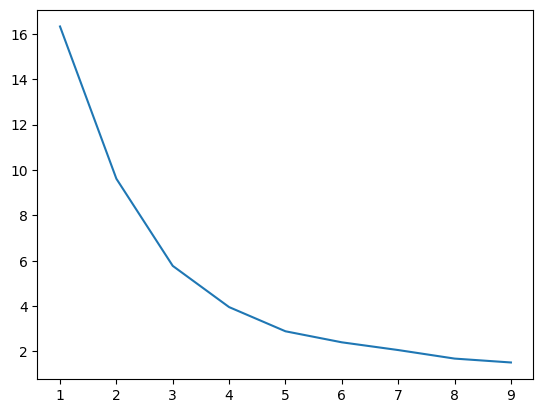

In [285]:
plt.plot(range(1,10),sse4)

In [287]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split